In [1]:
# 1. Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# 2. Path ke file fer2013.zip
zip_path = '/content/drive/MyDrive/Deep Learning/fer2013.zip'
extract_path = '/content/fer2013_data'

# 3. Ekstrak hanya jika belum diekstrak
import zipfile
import os

if not os.path.exists(extract_path):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)

# 4. Cek isi folder
print("Isi folder:", os.listdir(extract_path))


Mounted at /content/drive
Isi folder: ['test', 'train']


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


/tmp/ipython-input-816385726.py:36: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(48, 48, 3))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


449/449 ━━━━━━━━━━━━━━━━━━━━ 88s 183ms/step - accuracy: 0.2487 - loss: 1.9386 - val_accuracy: 0.3075 - val_loss: 1.6786
Epoch 2/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 81s 181ms/step - accuracy: 0.2947 - loss: 1.7380 - val_accuracy: 0.3281 - val_loss: 1.6585
Epoch 3/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 77s 171ms/step - accuracy: 0.3027 - loss: 1.7127 - val_accuracy: 0.3355 - val_loss: 1.6553
Epoch 4/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 85s 190ms/step - accuracy: 0.3134 - loss: 1.7000 - val_accuracy: 0.3433 - val_loss: 1.6339
Epoch 5/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 78s 173ms/step - accuracy: 0.3162 - loss: 1.6907 - val_accuracy: 0.3516 - val_loss: 1.6275
Epoch 6/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 74s 164ms/step - accuracy: 0.3223 - loss: 1.6833 - val_accuracy: 0.3569 - val_loss: 1.6210
Epoch 7/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 77s 171ms/step - accuracy: 0.3274 - loss: 1.6735 - val_accuracy: 0.3569 - val_loss: 1.6172
Epoch 8/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 78s 174ms/step - accuracy: 0.3268 - loss: 1.6746 - val

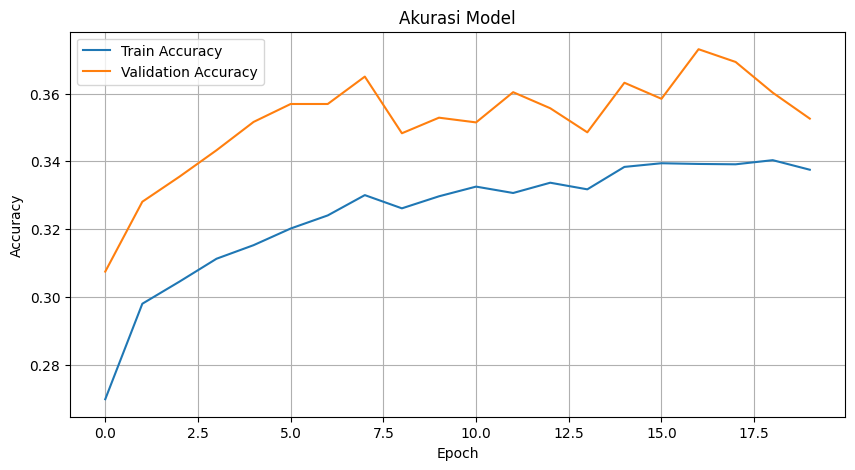

In [2]:
# 5. Import Library Tambahan
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, Input, Lambda
from sklearn.metrics import classification_report, confusion_matrix

# 6. Path Dataset
train_dir = '/content/fer2013_data/train'
val_dir = '/content/fer2013_data/test'

# 7. Preprocessing dengan ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=30,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(48, 48),
                                                    color_mode='grayscale',
                                                    batch_size=64,
                                                    class_mode='categorical')

val_generator = val_datagen.flow_from_directory(val_dir,
                                                target_size=(48, 48),
                                                color_mode='grayscale',
                                                batch_size=64,
                                                class_mode='categorical')

# 8. Transfer Learning dengan MobileNetV2
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(48, 48, 3))
base_model.trainable = False  # Freeze layer MobileNetV2

# Grayscale ke RGB agar kompatibel dengan MobileNetV2
inputs = Input(shape=(48, 48, 1))
x = Lambda(lambda x: tf.image.grayscale_to_rgb(x))(inputs)
x = base_model(x, training=False)
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(7, activation='softmax')(x)

model = Model(inputs, outputs)

# 9. Kompilasi Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 10. Training
history = model.fit(train_generator,
                    validation_data=val_generator,
                    epochs=20)

# 11. Visualisasi Akurasi
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Akurasi Model')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()


In [3]:
# Evaluasi model
val_loss, val_accuracy = model.evaluate(val_generator)
print(f"\n[INFO] Akurasi Validasi: {val_accuracy*100:.2f}%")
print(f"[INFO] Loss Validasi   : {val_loss:.4f}")

113/113 ━━━━━━━━━━━━━━━━━━━━ 15s 126ms/step - accuracy: 0.3609 - loss: 1.5866

[INFO] Akurasi Validasi: 35.26%
[INFO] Loss Validasi   : 1.6062


113/113 ━━━━━━━━━━━━━━━━━━━━ 17s 133ms/step

[INFO] Classification Report:

              precision    recall  f1-score   support

       angry       0.17      0.02      0.04       958
     disgust       0.00      0.00      0.00       111
        fear       0.14      0.02      0.03      1024
       happy       0.25      0.70      0.37      1774
     neutral       0.19      0.07      0.11      1233
         sad       0.15      0.08      0.11      1247
    surprise       0.11      0.10      0.11       831

    accuracy                           0.22      7178
   macro avg       0.14      0.14      0.11      7178
weighted avg       0.17      0.22      0.15      7178



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


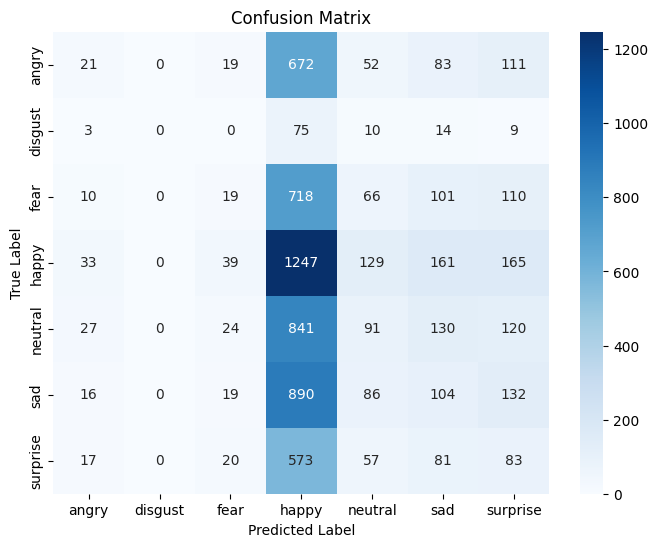

In [4]:
# Ambil label kelas
labels = list(val_generator.class_indices.keys())

# Reset generator sebelum prediksi
val_generator.reset()

# Prediksi seluruh data test
predictions = model.predict(val_generator, verbose=1)
y_pred = np.argmax(predictions, axis=1)
y_true = val_generator.classes

# Classification report
print("\n[INFO] Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=labels))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Visualisasi Confusion Matrix
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()